In [2]:
from google.colab import files

uploaded = files.upload()

Saving asos_merged_training.csv to asos_merged_training.csv


In [3]:
# ✅ Step 1: Load merged data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("asos_merged_training.csv")

In [4]:
# ✅ Step 2: Inspect structure
print(df.shape)
print(df.columns)
print(df.head())

(848454, 75)
Index(['variant_id', 'customer_id', 'isReturned', 'yearOfBirth', 'isMale',
       'shippingCountry', 'premier', 'salesPerCustomer', 'returnsPerCustomer',
       'customerReturnRate', 'customerId_level_return_code_A',
       'customerId_level_return_code_B', 'customerId_level_return_code_C',
       'customerId_level_return_code_D', 'customerId_level_return_code_E',
       'customerId_level_return_code_D.1', 'customerId_level_return_code_F',
       'customerId_level_return_code_G', 'customerId_level_return_code_H',
       'customerId_level_return_code_I', 'customerId_level_return_code_J',
       'customerId_level_return_code_K', 'customerId_level_return_code_L',
       'Country_A', 'Country_B', 'Country_C', 'Country_D', 'Country_E',
       'Country_F', 'Country_G', 'Country_H', 'Country_I', 'hash(productID)',
       'productType', 'hash(supplierRef)', 'brandDesc', 'avgGbpPrice',
       'avgDiscountValue', 'salesPerProduct', 'returnsPerProduct',
       'productReturnRate', 'v

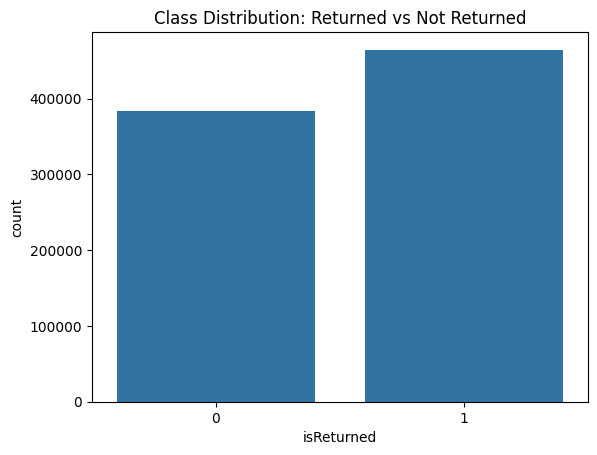

In [8]:
# ✅ Step 3: Explore target class balance
sns.countplot(data=df, x="isReturned")
plt.title("Class Distribution: Returned vs Not Returned")
plt.show()


In [9]:
# ✅ Step 4: Check numeric correlations
corr = df.corr(numeric_only=True)["isReturned"].sort_values(ascending=False)
print("Top correlated features:")
print(corr.head(15))

Top correlated features:
isReturned                          1.000000
customerReturnRate                  0.534717
productReturnRate                   0.316291
returnsPerCustomer                  0.205395
Country_E                           0.159774
productType_B                       0.151105
avgGbpPrice                         0.132412
customerId_level_return_code_D.1    0.080122
productType_D                       0.075048
variantID_level_return_code_J       0.071145
variantID_level_return_code_D.1     0.068183
variantID_level_return_code_I       0.065309
returnsPerProduct                   0.060668
productType_J                       0.043209
Brand_B                             0.037135
Name: isReturned, dtype: float64


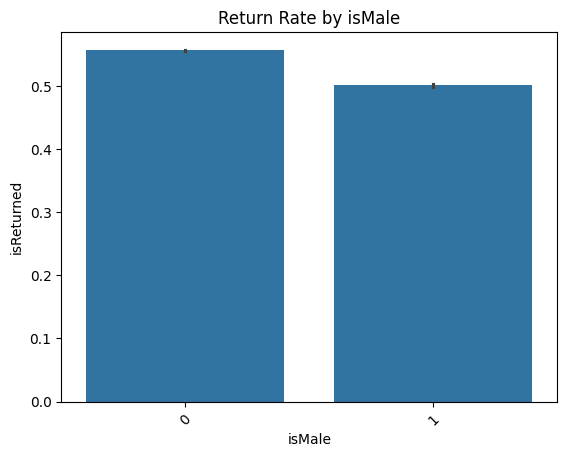

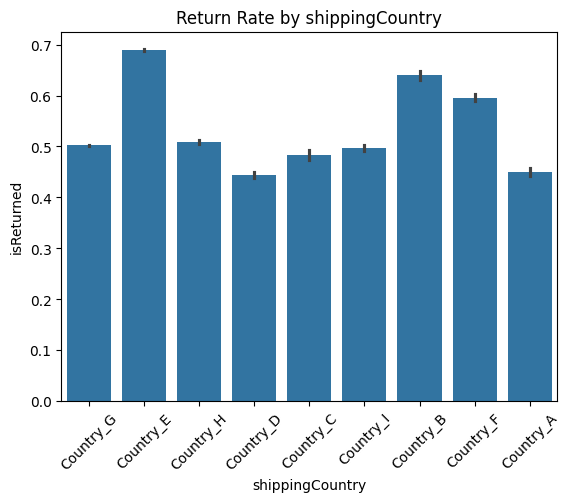

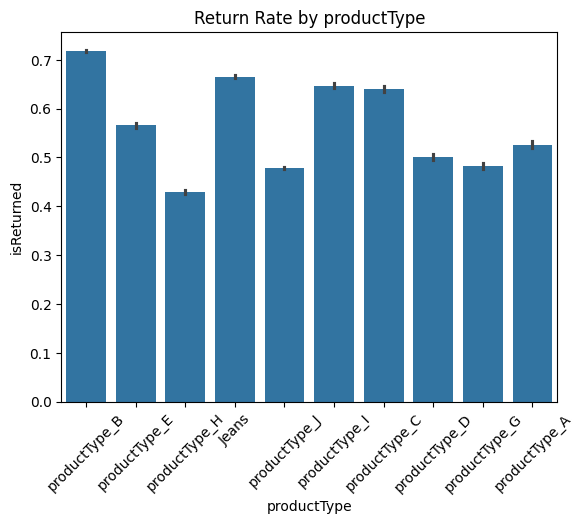

In [7]:
# ✅ Step 5: Return rate by key features
categorical = ["isMale", "shippingCountry", "productType"]
for col in categorical:
    if col in df.columns:
        top_vals = df[col].value_counts().nlargest(10).index
        sns.barplot(data=df[df[col].isin(top_vals)], x=col, y="isReturned")
        plt.title(f"Return Rate by {col}")
        plt.xticks(rotation=45)
        plt.show()

/tmp/ipython-input-19-2632823484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 60, 100],


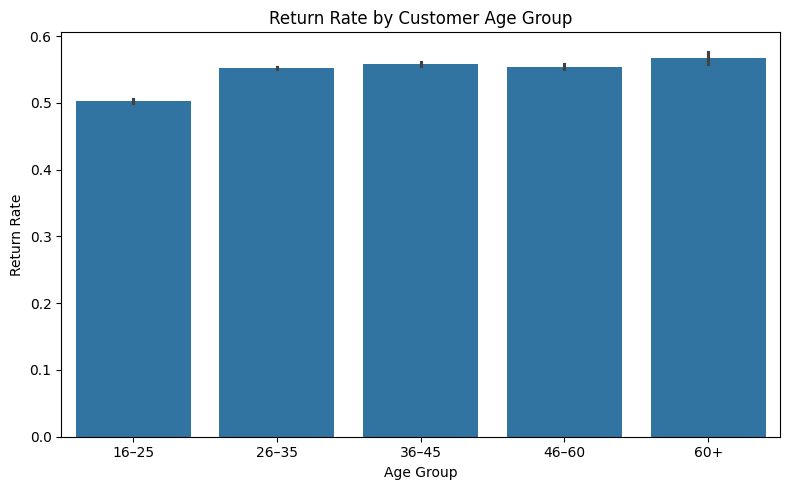

In [19]:
# ✅ Step 6: Deep Dive - Customer Return Behaviors
# 📊 Average return rate by customer age group
import datetime
current_year = datetime.datetime.now().year

if 'yearOfBirth' in df.columns:
    df['age'] = current_year - df['yearOfBirth']
    df = df[df['age'].between(16, 100)]  # filter out outliers

    # ✅ Create age group bins
    df['age_group'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 60, 100],
                             labels=['16–25', '26–35', '36–45', '46–60', '60+'])

    # ✅ Visualize return rate by age group
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='age_group', y='isReturned')
    plt.title("Return Rate by Customer Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Return Rate")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ yearOfBirth column not found.")

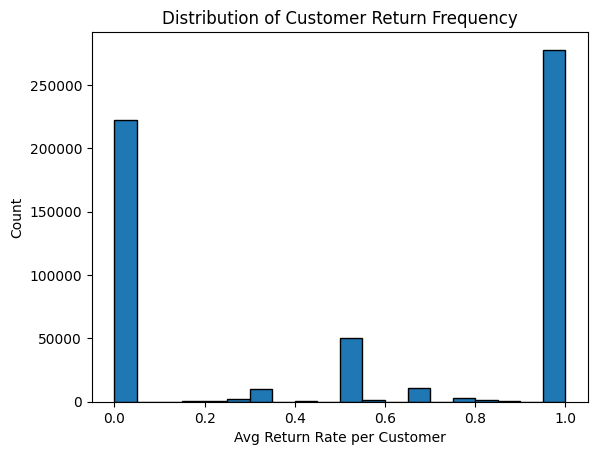

In [12]:
# 📊 Return frequency per customer
return_freq = df.groupby('customer_id')['isReturned'].mean()
plt.hist(return_freq, bins=20, edgecolor='black')
plt.title("Distribution of Customer Return Frequency")
plt.xlabel("Avg Return Rate per Customer")
plt.ylabel("Count")
plt.show()

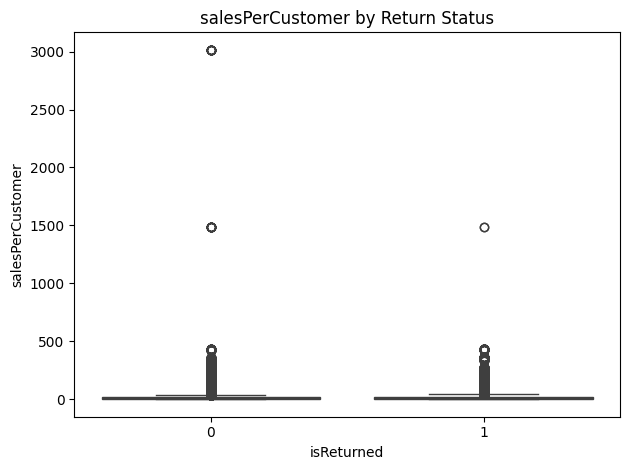

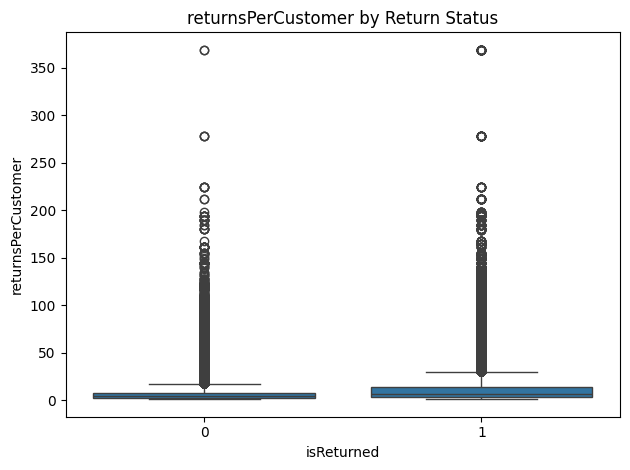

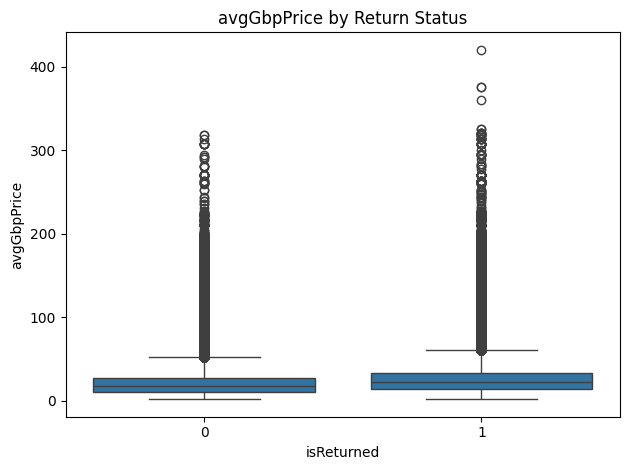

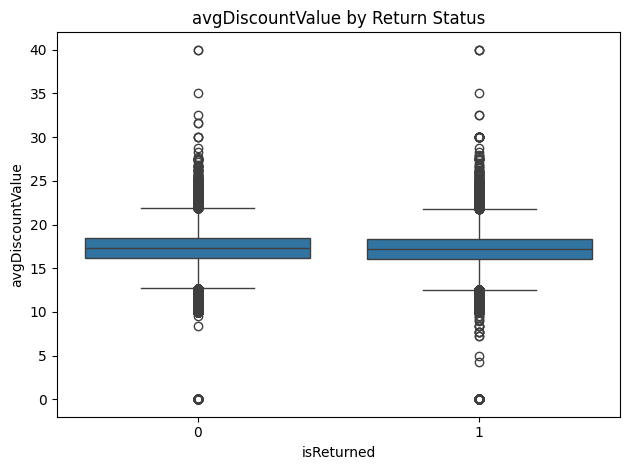

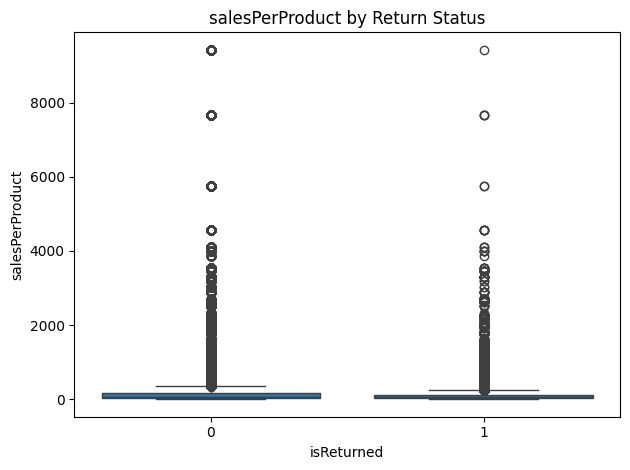

In [20]:
# 📊 Deep Dive: Product & Sales Metrics
metrics = ['salesPerCustomer', 'returnsPerCustomer', 'avgGbpPrice', 'avgDiscountValue', 'salesPerProduct']
for metric in metrics:
    if metric in df.columns:
        sns.boxplot(data=df, x="isReturned", y=metric)
        plt.title(f"{metric} by Return Status")
        plt.tight_layout()
        plt.show()